In [1]:
import pandas as pd
from prophet import Prophet

In [88]:
df = pd.read_csv('train.csv',
                   usecols=["Date", "number_sold"],
                   parse_dates=["Date"],
                   header=0)

In [89]:
df.rename(columns={'Date': 'ds', 'number_sold': 'y'},  inplace = True)

In [90]:
df2= df.dropna()

In [91]:
df.tail()

,ds,y
230085,2018-12-27,890
230086,2018-12-28,892
230087,2018-12-29,895
230088,2018-12-30,899
230089,2018-12-31,912


In [76]:
df3 = df2.loc[(df['ds'] >= '2015-01-01')
                     & (df['ds'] < '2020-01-01')]

In [92]:
m = Prophet()
m.fit(df)

15:07:23 - cmdstanpy - INFO - Chain [1] start processing
15:07:45 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3647,2019-12-27
3648,2019-12-28
3649,2019-12-29
3650,2019-12-30
3651,2019-12-31


In [94]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3647,2019-12-27,793.374377,515.055790,1029.600943
3648,2019-12-28,794.051534,534.486821,1050.801762
3649,2019-12-29,793.722565,528.342411,1068.131999
3650,2019-12-30,792.466743,542.449314,1059.759639
3651,2019-12-31,791.288927,544.843284,1060.188904


C:\Users\rafae\anaconda3\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\rafae\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


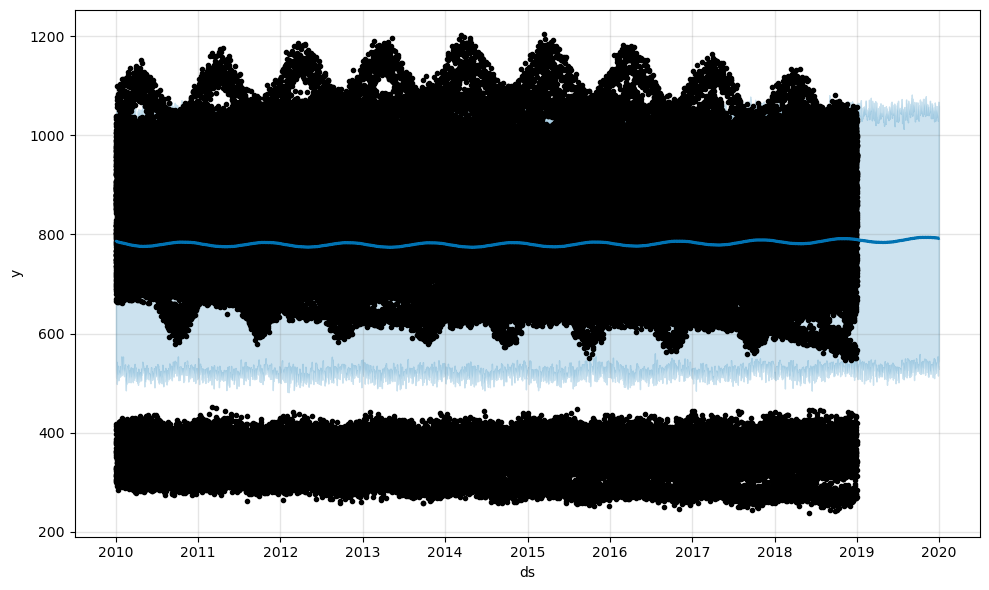

In [95]:
fig1 = m.plot(forecast)

C:\Users\rafae\anaconda3\Lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\rafae\anaconda3\Lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\rafae\anaconda3\Lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

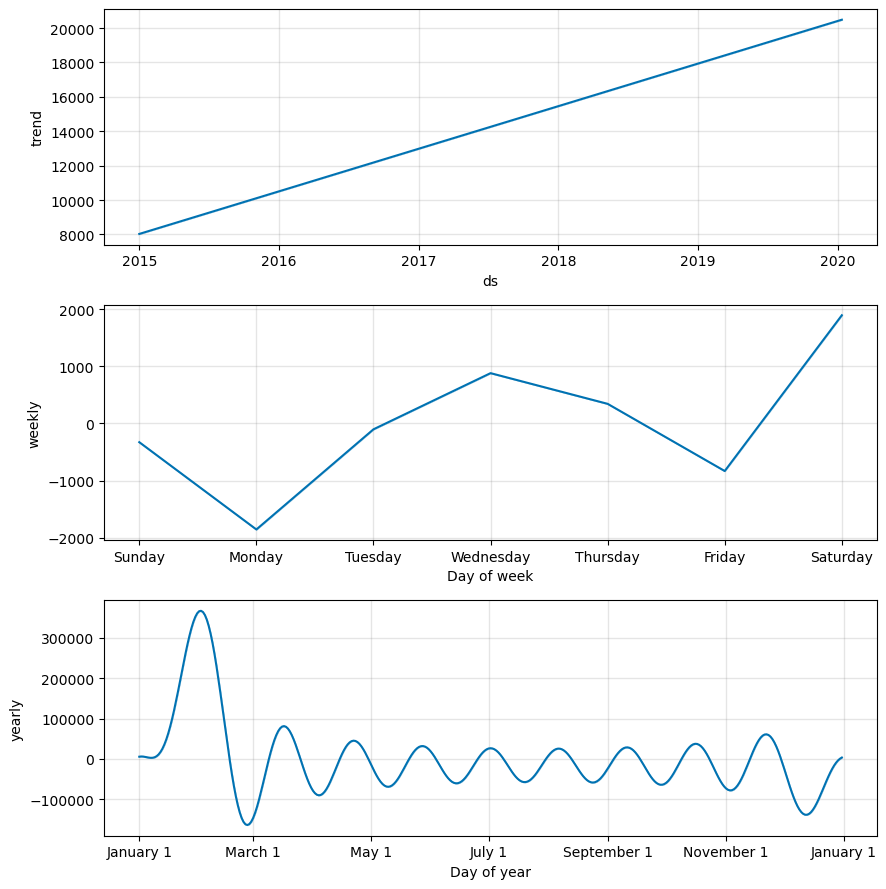

In [82]:
fig2 = m.plot_components(forecast)